In [2]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
print(type(housing))

<class 'sklearn.utils._bunch.Bunch'>


In [7]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [8]:
housing.data.shape

(20640, 8)

In [9]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
dbs = pd.DataFrame(housing.data, columns=housing.feature_names)
dbs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
dbs['MedIncNew'] = housing.target

In [13]:
dbs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedIncNew
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
# finding missing values
dbs.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedIncNew     0
dtype: int64

In [15]:
dbs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedIncNew
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 0, 'Median Income')

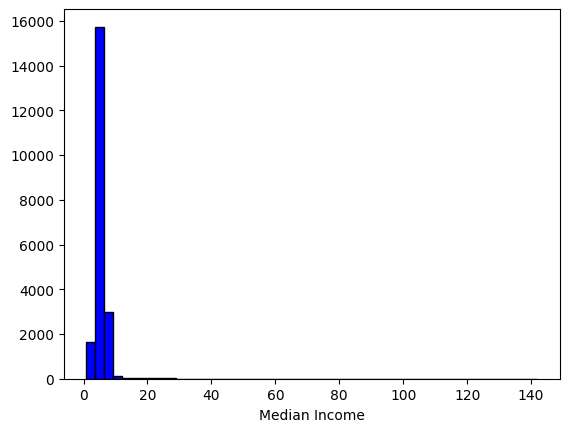

In [16]:
plt.hist(dbs.AveRooms, bins=50, color='blue', edgecolor='black')
plt.xlabel('Median Income')

<Axes: >

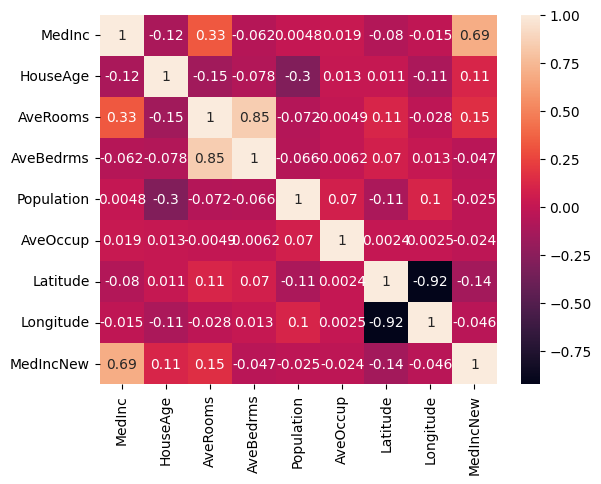

In [17]:
#checking correlation
sns.heatmap(dbs.corr(), annot=True)

Degree of Relationship --> Correlation --> -1 to 1 (Pearson's Correlation)
1. Correlation = 0 Absense of linear 

r(coefficent of relation) =  ∑(x-x̄)(y-ȳ)/(√ (∑(x-x̄)^2)*(√∑(y-ȳ)^2))


y(actual) - y(predict) = SSE (Residual Error)

y(predict) - ȳ(Mean) = SSR (Regression Error)

SST (Total) = SSE + SSR

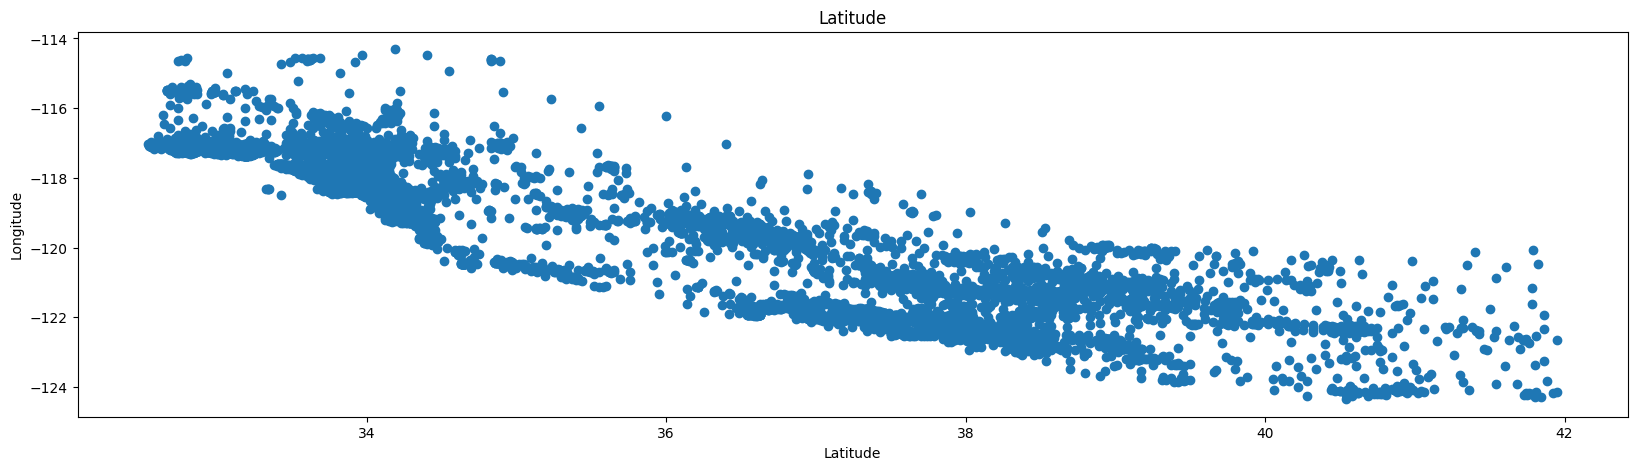

In [18]:
#data points distribution

#negative corelation --> x increases y decreases --> r --> -1

plt.figure(figsize=(20, 5))
features = [ 'Latitude']
target = dbs['Longitude']

for i,col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dbs[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Longitude')

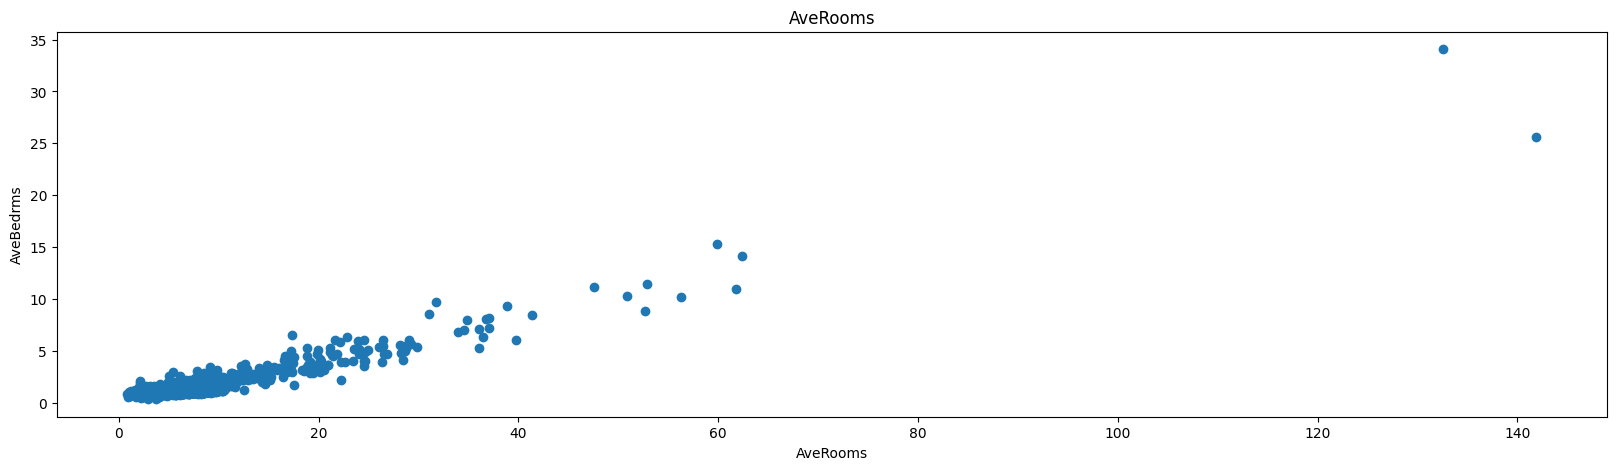

In [19]:
#postive corelation --> x increases y increases --> r --> 1

plt.figure(figsize=(20, 5))
features = [ 'AveRooms']
target = dbs['AveBedrms']

for i,col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dbs[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('AveBedrms')

In [23]:
y_1 = dbs.AveBedrms
x_1 = dbs.AveRooms
y_1

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: AveBedrms, Length: 20640, dtype: float64

In [28]:
#splitting the data into training and testing data


#creating 2D array
x_rm=np.array(x_1).reshape(-1,1)
y_1 = np.array(y_1).reshape(-1,1)
y_1.shape

(20640, 1)

In [29]:
#splitting the data into training and testing data
xrm_train, xrm_test, y1_train, y1_test = train_test_split(x_rm, y_1, test_size=0.2, random_state=0)

In [31]:
xrm_train.shape

(16512, 1)

In [32]:
xrm_test.shape

(4128, 1)

In [33]:
reg_rm=LinearRegression()
reg_rm.fit(xrm_train, y1_train)

LinearRegression()

In [35]:
y1_train_pred = reg_rm.predict(xrm_train)
y1_train_pred

array([[1.47547653],
       [1.07862327],
       [0.96963459],
       ...,
       [0.79952072],
       [0.94845766],
       [0.8472647 ]])

In [37]:
r2=reg_rm.score(xrm_train, y1_train)
r2

0.7286878304463622

In [39]:
rmse=np.sqrt(mean_squared_error(y1_train, y1_train_pred))
rmse

0.2549764137394166

In [40]:
y1_test_pred = reg_rm.predict(xrm_test)

In [42]:
r2=reg_rm.score(xrm_test, y1_test)
r2

0.656837905160549

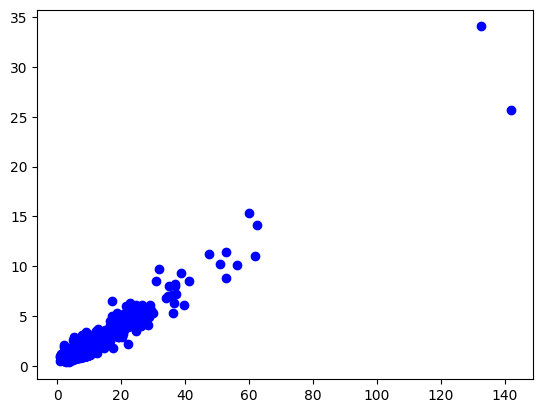

In [44]:
predictions_space = np.linspace(min(x_rm), max(x_rm)).reshape(-1,1)
plt.scatter(x_rm, y_1, color='blue')


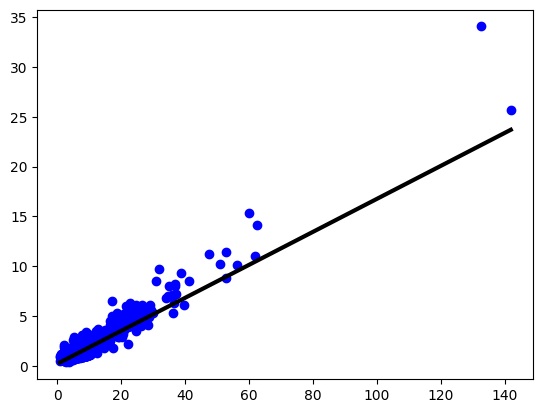

In [46]:
#drawing the line
predictions_space = np.linspace(min(x_rm), max(x_rm)).reshape(-1,1)
plt.scatter(x_rm, y_1, color='blue')
#regression line
plt.plot(predictions_space, reg_rm.predict(predictions_space), color='black', linewidth=3)

Trying Mult-variable Linear Regression

In [48]:
x=dbs.drop('MedInc', axis=1)
y=dbs['MedInc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_train_pred = reg_all.predict(x_train)
r2=reg_all.score(x_train, y_train)

In [49]:
r2

0.7376430658845431

In [50]:
reg_all_test = LinearRegression()
reg_all_test.fit(x_test, y_test)
y_test_pred = reg_all_test.predict(x_test)
r2=reg_all_test.score(x_test, y_test)
r2

0.7408691238849104

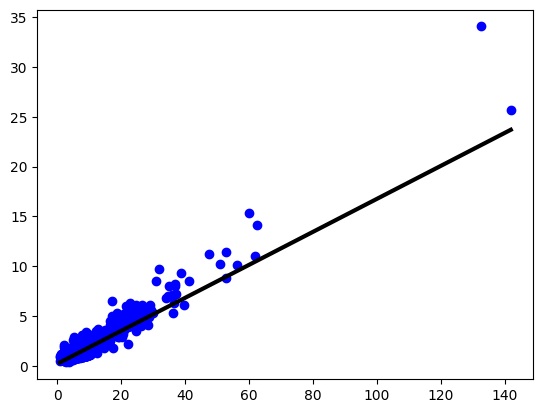

In [53]:
x=np.array(x_1).reshape(-1,1)
y = np.array(y_1).reshape(-1,1)

predictions_space = np.linspace(min(x), max(x)).reshape(-1,1)
plt.scatter(x, y, color='blue')
#regression line
plt.plot(predictions_space, reg_rm.predict(predictions_space), color='black', linewidth=3)


In [54]:
rmse=np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse

0.9527098834597487